In [79]:
import numpy as np
import pandas as pd

In [80]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [81]:
print(f"X shape: {x_train.shape}, X type:{type(x_train)}")
print(f"Square Feet, Numbers of bedroom, Numbers of floor, Age of home")
print(x_train)
print(f"Y shape: {y_train.shape}, Y type:{type(y_train)}")
print(f"Price")
print(y_train)

X shape: (3, 4), X type:<class 'numpy.ndarray'>
Square Feet, Numbers of bedroom, Numbers of floor, Age of home
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y shape: (3,), Y type:<class 'numpy.ndarray'>
Price
[460 232 178]


In [82]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [83]:
# Vector dot product for single column or features

def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [84]:
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")
print(f"w: {w_init}");
print(f"b_init: {b_init}");
# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predcition: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
b_init: 785.1811367994083
f_wb shape (), predcition: 459.9999976194083


In [85]:
def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

In [86]:
x_vec = x_train[0,:]
print(f"x_vec_shape: {x_vec.shape}, x_vec value: {x_vec}")
# prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"prediction: {f_wb}")

x_vec_shape: (4,), x_vec value: [2104    5    1   45]
prediction: 459.9999976194083


In [87]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w_init) + b
        cost = (f_wb_i - y[i]) ** 2
        cost = cost / (2 * m)
    return cost

In [88]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"cost: {cost}")

cost: 1.702159842748978e-13


In [89]:
# Gradient descent with multiple variables
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw



In [90]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_db at initital w, b: {tmp_dj_db}")
print(f"dj_dw at initital w, b: {tmp_dj_dw}")

dj_db at initital w, b: -1.6739251501955248e-06
dj_dw at initital w, b: [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


In [91]:
import copy
import math
import matplotlib.pyplot as plt
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            j_history.append(cost_function(x, y, w, b))
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: cost {j_history[-1]:8.2f}   ")
    
    return w, b, j_history



In [92]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
print(initial_w)

iteration = 1000
alpha = 5.0e-7

w_final, b_final, j_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                             compute_cost, compute_gradient,
                                             alpha, iteration)

print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final} ")
m,_ = x_train.shape

for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

[0. 0. 0. 0.]
Iteration    0: cost 102751.53   
Iteration  100: cost 102751.60   
Iteration  200: cost 102751.66   
Iteration  300: cost 102751.73   
Iteration  400: cost 102751.79   
Iteration  500: cost 102751.85   
Iteration  600: cost 102751.91   
Iteration  700: cost 102751.97   
Iteration  800: cost 102752.03   
Iteration  900: cost 102752.10   
b, w found by gradient descent: -0.00, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


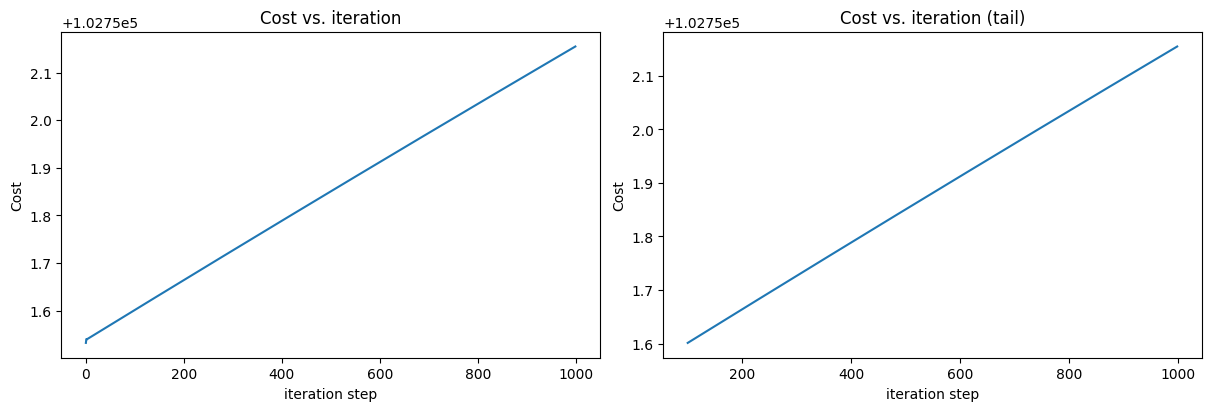

In [93]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist)
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

'''
I have the house data
I will do this project in scikit learn 
and then I will create my own methods to reverse engineer and implement
That way i will get an idea and foundation also


'''
